In [2]:
from data.coco_loader import *
from models.coco_model import *
import os
import sys
import inspect
import sklearn

device =  torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

In [4]:
root = '../../../data/jordanlei/coco/images/train2017'
annfile = '../../../data/jordanlei/coco/annotations/instances_train2017.json'
metadatafile = 'data/metadata/cocometadata_train.p'
strength = 0.9

coco_dataset, metadata = get_data(root, annfile, metadatafile, size = (100, 100), strength = strength, use_supercategory = True)
train, val = get_train_val_split(coco_dataset)
train_loader = DataLoader(train, batch_size = 32, shuffle = True, num_workers=4)
val_loader = DataLoader(val, batch_size = 32, shuffle = True, num_workers=4)

loading annotations into memory...
Done (t=14.49s)
creating index...
index created!


In [5]:
def get_class_weights(superclass = False): 
    helper_dicts = get_dicts()
    cat_weights = class_weight(category_count)
    supercat_weights = class_weight(supercategory_count)
    
    label_weights = defaultdict(lambda: 0)
    if superclass:
        for k in supercat_weights.keys(): 
            label = helper_dicts["supercat_to_sl"][k]
            label_weights[label] = supercat_weights[k]
    else:
        for k in cat_weights.keys():
            label = helper_dicts["cat_to_l"][k]
            label_weights[label] = cat_weights[k]
            
    return [label_weights[i] for i in range(max(label_weights.keys()) + 1)]

COCO Object Based Attention Model
Validating ...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

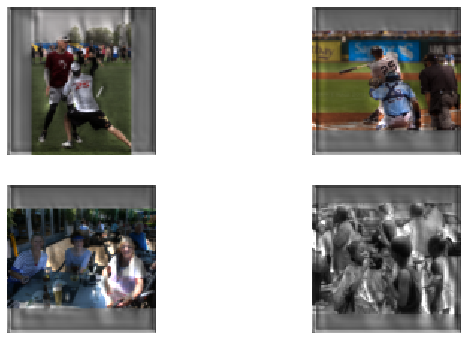

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

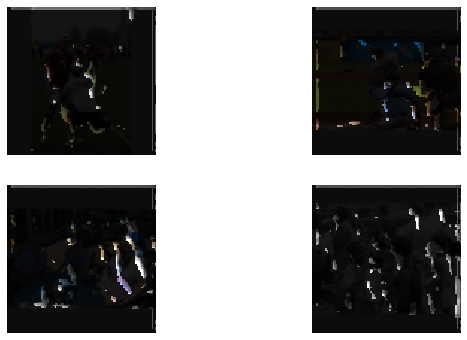

<Figure size 432x288 with 0 Axes>

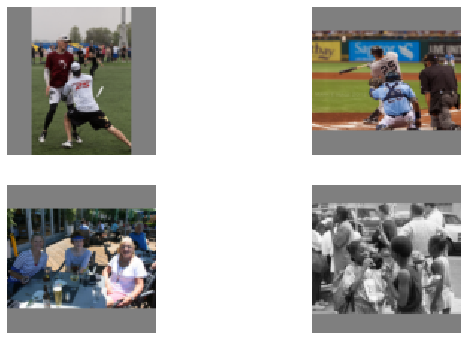

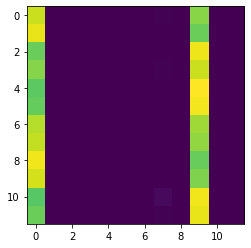

	[Validation] Acc 0.1940	F1 0.0385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	[1/10] 	 Accuracy:0.172	F1:0.028	Loss: 315.663


<Figure size 432x288 with 0 Axes>

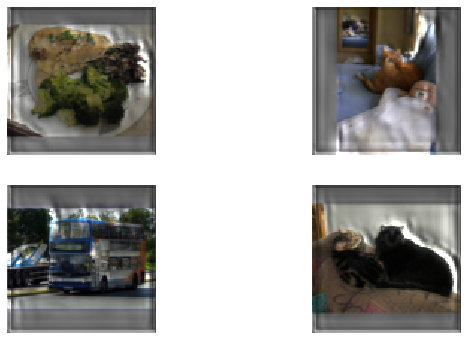

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

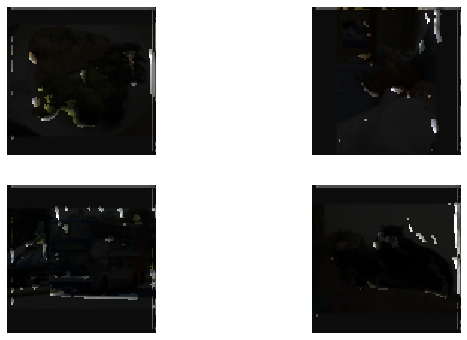

<Figure size 432x288 with 0 Axes>

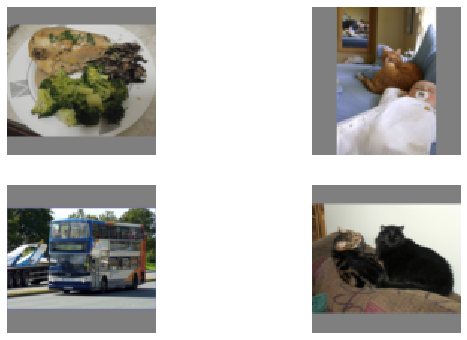

	[1/10] 	 Accuracy:0.271	F1:0.046	Loss: 190.907
	[1/10] 	 Accuracy:0.251	F1:0.042	Loss: 171.648
	[1/10] 	 Accuracy:0.235	F1:0.039	Loss: 161.613
	[1/10] 	 Accuracy:0.262	F1:0.045	Loss: 153.320
	[1/10] 	 Accuracy:0.279	F1:0.048	Loss: 144.976
	[1/10] 	 Accuracy:0.298	F1:0.051	Loss: 133.370
	[1/10] 	 Accuracy:0.328	F1:0.057	Loss: 127.305
	[1/10] 	 Accuracy:0.359	F1:0.062	Loss: 123.491
	[1/10] 	 Accuracy:0.370	F1:0.063	Loss: 121.446
	[1/10] 	 Accuracy:0.385	F1:0.065	Loss: 117.801


<Figure size 432x288 with 0 Axes>

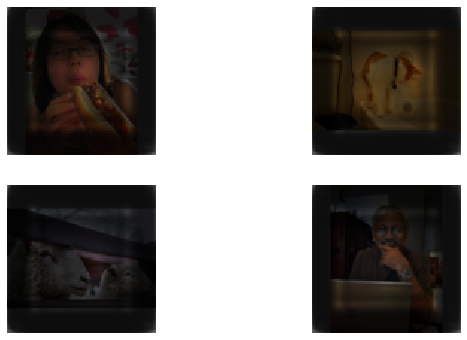

<Figure size 432x288 with 0 Axes>

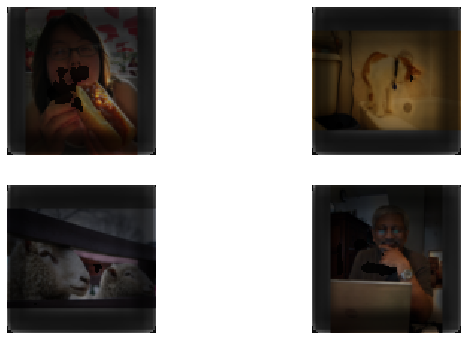

<Figure size 432x288 with 0 Axes>

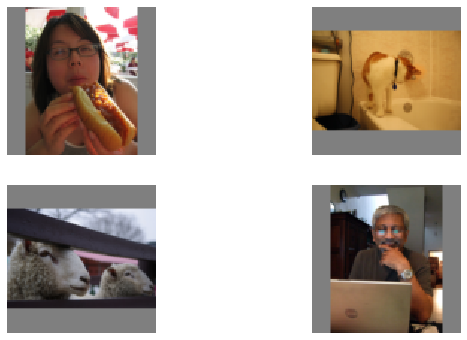

	[1/10] 	 Accuracy:0.381	F1:0.064	Loss: 117.381
	[1/10] 	 Accuracy:0.379	F1:0.062	Loss: 115.607
	[1/10] 	 Accuracy:0.391	F1:0.065	Loss: 113.930
	[1/10] 	 Accuracy:0.393	F1:0.066	Loss: 113.225
	[1/10] 	 Accuracy:0.391	F1:0.066	Loss: 113.188
	[1/10] 	 Accuracy:0.391	F1:0.066	Loss: 112.142
	[1/10] 	 Accuracy:0.369	F1:0.063	Loss: 112.604
	[1/10] 	 Accuracy:0.366	F1:0.062	Loss: 112.795
	[1/10] 	 Accuracy:0.337	F1:0.058	Loss: 112.336
	[1/10] 	 Accuracy:0.324	F1:0.055	Loss: 112.452


<Figure size 432x288 with 0 Axes>

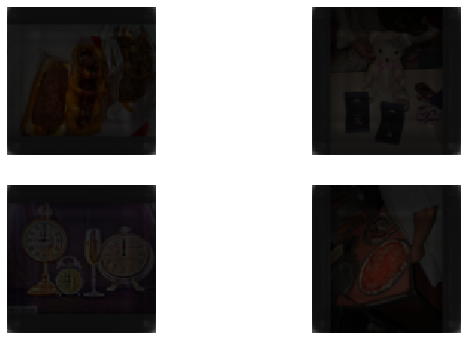

<Figure size 432x288 with 0 Axes>

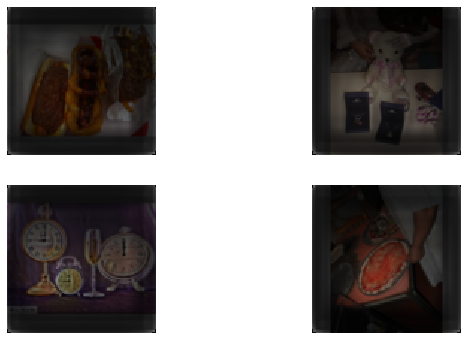

<Figure size 432x288 with 0 Axes>

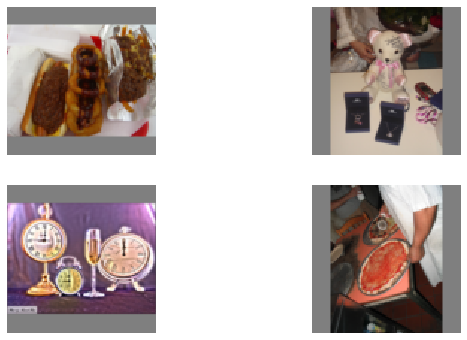

	[1/10] 	 Accuracy:0.295	F1:0.049	Loss: 113.087
	[1/10] 	 Accuracy:0.286	F1:0.047	Loss: 111.925
	[1/10] 	 Accuracy:0.251	F1:0.042	Loss: 111.545
	[1/10] 	 Accuracy:0.241	F1:0.040	Loss: 112.302
	[1/10] 	 Accuracy:0.217	F1:0.037	Loss: 112.093
	[1/10] 	 Accuracy:0.222	F1:0.038	Loss: 111.138
	[1/10] 	 Accuracy:0.217	F1:0.038	Loss: 111.927
	[1/10] 	 Accuracy:0.217	F1:0.037	Loss: 111.643
	[1/10] 	 Accuracy:0.216	F1:0.037	Loss: 110.909
	[1/10] 	 Accuracy:0.213	F1:0.036	Loss: 110.839


<Figure size 432x288 with 0 Axes>

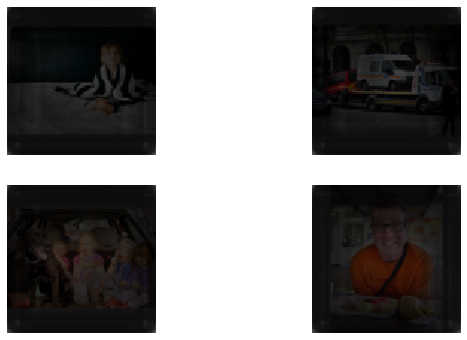

<Figure size 432x288 with 0 Axes>

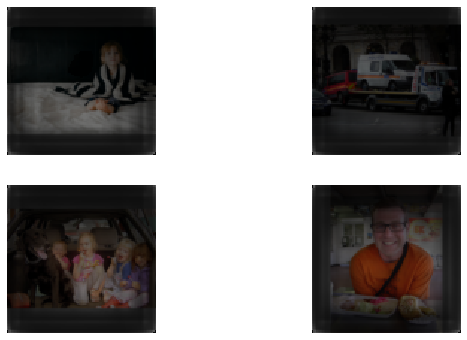

<Figure size 432x288 with 0 Axes>

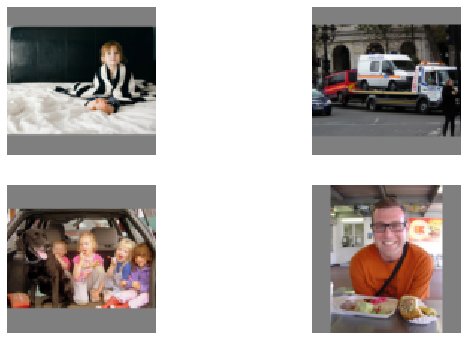

	[1/10] 	 Accuracy:0.207	F1:0.035	Loss: 110.681
	[1/10] 	 Accuracy:0.209	F1:0.035	Loss: 110.422
	[1/10] 	 Accuracy:0.211	F1:0.036	Loss: 110.064
	[1/10] 	 Accuracy:0.178	F1:0.031	Loss: 109.927
	[1/10] 	 Accuracy:0.158	F1:0.028	Loss: 110.012
	[1/10] 	 Accuracy:0.154	F1:0.028	Loss: 111.315
	[1/10] 	 Accuracy:0.158	F1:0.028	Loss: 110.501
	[1/10] 	 Accuracy:0.158	F1:0.028	Loss: 110.259
	[1/10] 	 Accuracy:0.190	F1:0.033	Loss: 109.075
	[1/10] 	 Accuracy:0.216	F1:0.036	Loss: 110.005


<Figure size 432x288 with 0 Axes>

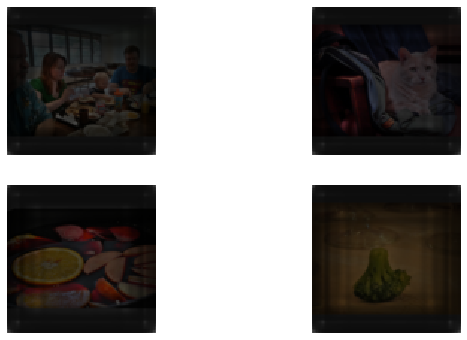

<Figure size 432x288 with 0 Axes>

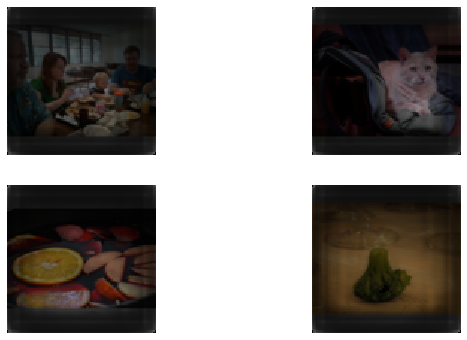

<Figure size 432x288 with 0 Axes>

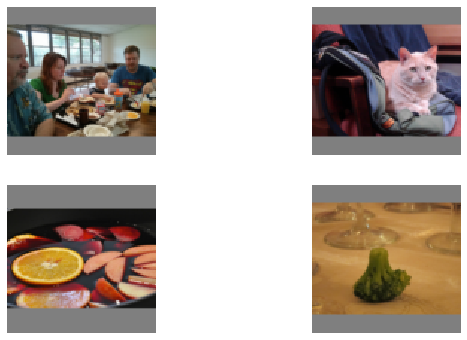

	[1/10] 	 Accuracy:0.220	F1:0.038	Loss: 107.724
Validating ...


<Figure size 432x288 with 0 Axes>

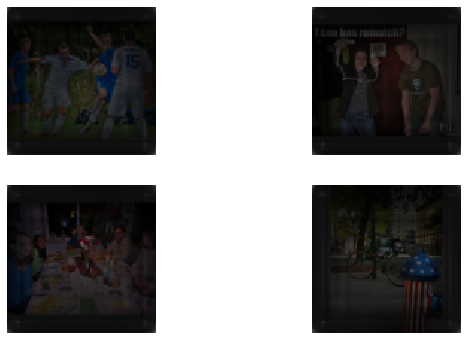

<Figure size 432x288 with 0 Axes>

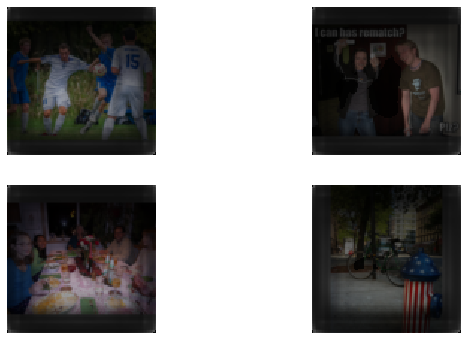

<Figure size 432x288 with 0 Axes>

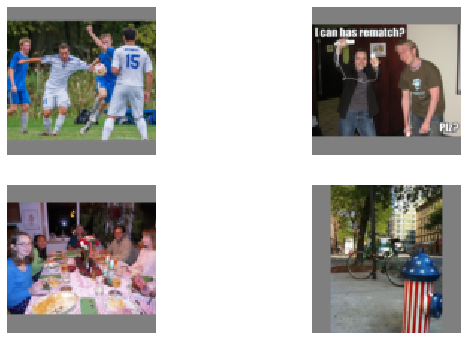

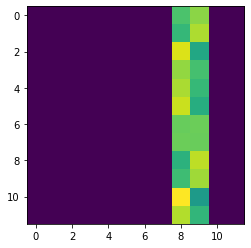

	[Validation] Acc 0.2206	F1 0.0424
	[2/10] 	 Accuracy:0.220	F1:0.038	Loss: 107.324
	[2/10] 	 Accuracy:0.215	F1:0.037	Loss: 107.472
	[2/10] 	 Accuracy:0.212	F1:0.038	Loss: 108.256
	[2/10] 	 Accuracy:0.209	F1:0.037	Loss: 108.511
	[2/10] 	 Accuracy:0.215	F1:0.037	Loss: 109.048
	[2/10] 	 Accuracy:0.215	F1:0.037	Loss: 110.375
	[2/10] 	 Accuracy:0.217	F1:0.036	Loss: 110.887
	[2/10] 	 Accuracy:0.217	F1:0.036	Loss: 109.988
	[2/10] 	 Accuracy:0.224	F1:0.037	Loss: 110.174


<Figure size 432x288 with 0 Axes>

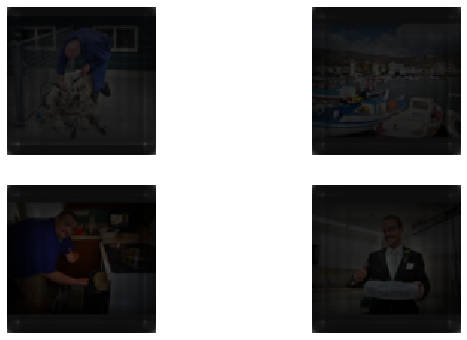

<Figure size 432x288 with 0 Axes>

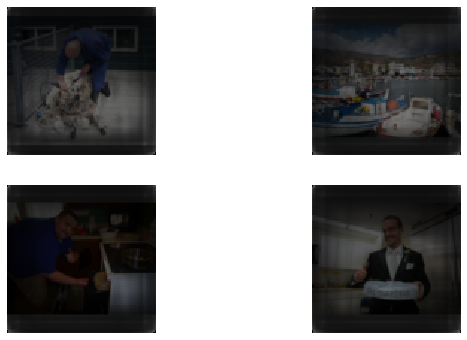

<Figure size 432x288 with 0 Axes>

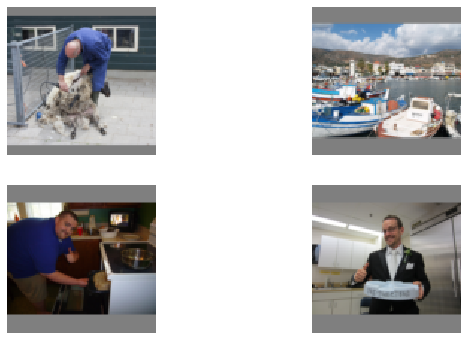

	[2/10] 	 Accuracy:0.222	F1:0.037	Loss: 109.596
	[2/10] 	 Accuracy:0.218	F1:0.037	Loss: 108.736
	[2/10] 	 Accuracy:0.222	F1:0.038	Loss: 107.651
	[2/10] 	 Accuracy:0.218	F1:0.037	Loss: 108.561
	[2/10] 	 Accuracy:0.216	F1:0.037	Loss: 107.804
	[2/10] 	 Accuracy:0.215	F1:0.038	Loss: 107.587
	[2/10] 	 Accuracy:0.215	F1:0.037	Loss: 106.979
	[2/10] 	 Accuracy:0.212	F1:0.037	Loss: 107.152
	[2/10] 	 Accuracy:0.217	F1:0.038	Loss: 106.157
	[2/10] 	 Accuracy:0.215	F1:0.038	Loss: 105.751


<Figure size 432x288 with 0 Axes>

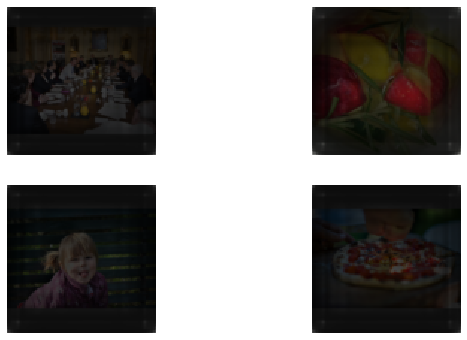

<Figure size 432x288 with 0 Axes>

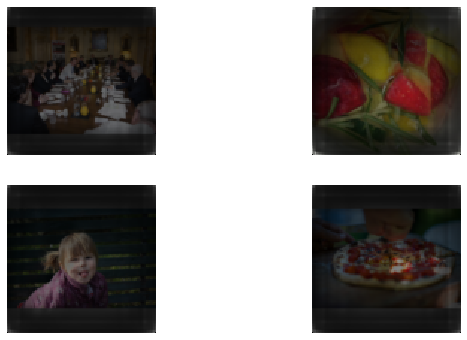

<Figure size 432x288 with 0 Axes>

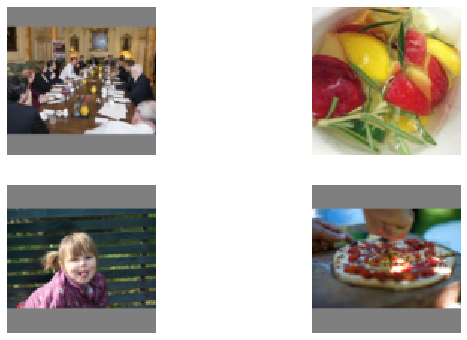

	[2/10] 	 Accuracy:0.208	F1:0.038	Loss: 107.387
	[2/10] 	 Accuracy:0.207	F1:0.038	Loss: 107.479
	[2/10] 	 Accuracy:0.207	F1:0.038	Loss: 108.855
	[2/10] 	 Accuracy:0.207	F1:0.038	Loss: 109.319
	[2/10] 	 Accuracy:0.204	F1:0.037	Loss: 109.562
	[2/10] 	 Accuracy:0.212	F1:0.038	Loss: 107.804
	[2/10] 	 Accuracy:0.217	F1:0.040	Loss: 107.040
	[2/10] 	 Accuracy:0.218	F1:0.041	Loss: 104.998
	[2/10] 	 Accuracy:0.212	F1:0.040	Loss: 103.193
	[2/10] 	 Accuracy:0.217	F1:0.040	Loss: 102.035


<Figure size 432x288 with 0 Axes>

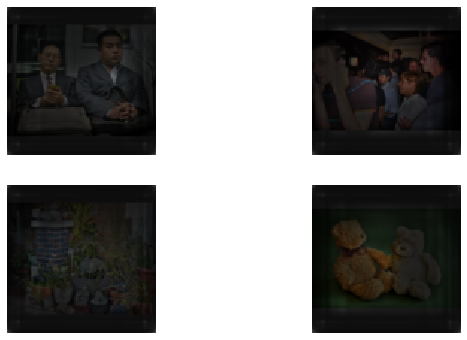

<Figure size 432x288 with 0 Axes>

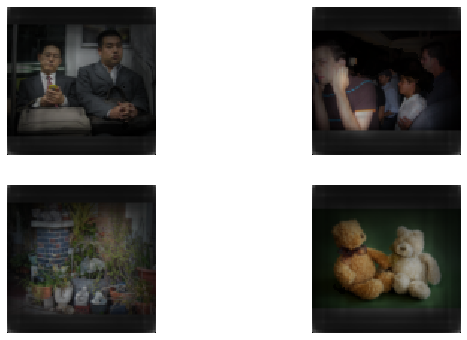

<Figure size 432x288 with 0 Axes>

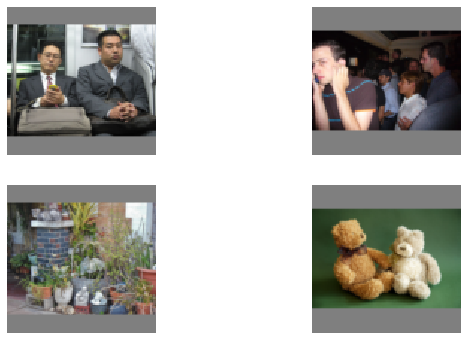

	[2/10] 	 Accuracy:0.212	F1:0.037	Loss: 102.408
	[2/10] 	 Accuracy:0.212	F1:0.037	Loss: 103.808
	[2/10] 	 Accuracy:0.212	F1:0.036	Loss: 105.346
	[2/10] 	 Accuracy:0.223	F1:0.039	Loss: 107.481
	[2/10] 	 Accuracy:0.223	F1:0.039	Loss: 108.008
	[2/10] 	 Accuracy:0.226	F1:0.040	Loss: 107.341
	[2/10] 	 Accuracy:0.214	F1:0.037	Loss: 107.964
	[2/10] 	 Accuracy:0.246	F1:0.043	Loss: 108.355
	[2/10] 	 Accuracy:0.242	F1:0.043	Loss: 109.094
	[2/10] 	 Accuracy:0.257	F1:0.047	Loss: 109.685


<Figure size 432x288 with 0 Axes>

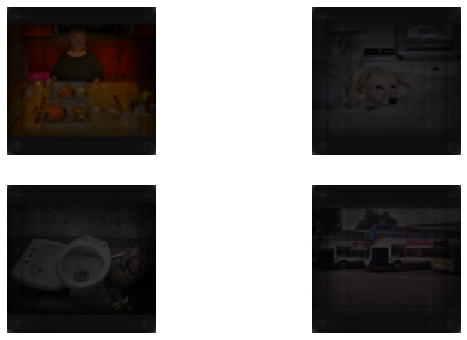

<Figure size 432x288 with 0 Axes>

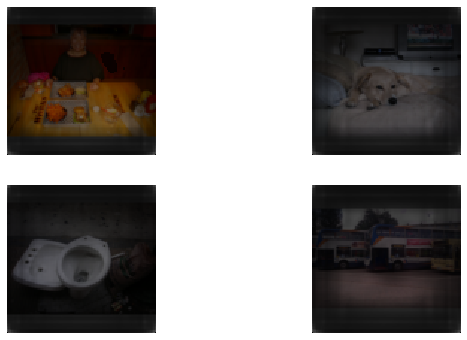

<Figure size 432x288 with 0 Axes>

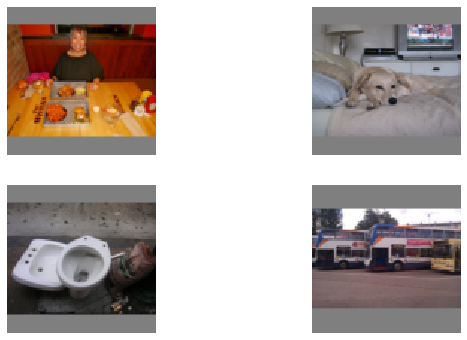

	[2/10] 	 Accuracy:0.257	F1:0.048	Loss: 111.906
	[2/10] 	 Accuracy:0.268	F1:0.049	Loss: 110.188
	[2/10] 	 Accuracy:0.231	F1:0.044	Loss: 109.115
Validating ...


<Figure size 432x288 with 0 Axes>

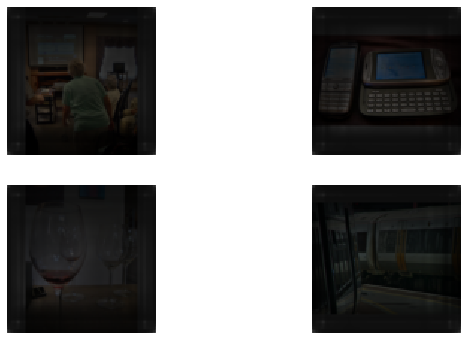

<Figure size 432x288 with 0 Axes>

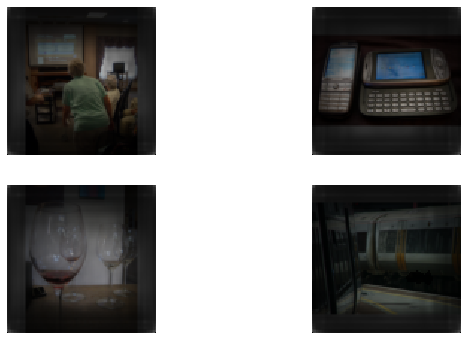

<Figure size 432x288 with 0 Axes>

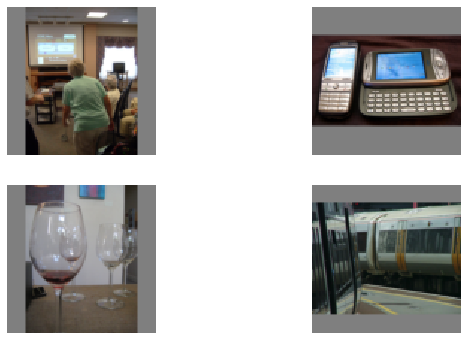

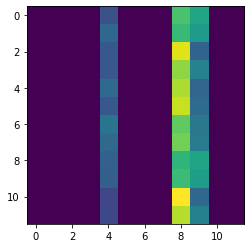

	[Validation] Acc 0.1611	F1 0.0455
	[3/10] 	 Accuracy:0.226	F1:0.044	Loss: 107.505
	[3/10] 	 Accuracy:0.210	F1:0.040	Loss: 105.620
	[3/10] 	 Accuracy:0.200	F1:0.038	Loss: 103.901
	[3/10] 	 Accuracy:0.196	F1:0.038	Loss: 104.755
	[3/10] 	 Accuracy:0.169	F1:0.035	Loss: 105.862
	[3/10] 	 Accuracy:0.161	F1:0.035	Loss: 107.283
	[3/10] 	 Accuracy:0.150	F1:0.035	Loss: 108.327


<Figure size 432x288 with 0 Axes>

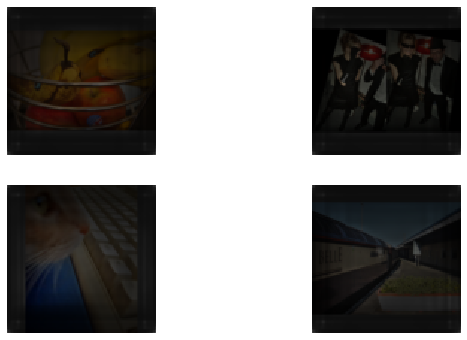

<Figure size 432x288 with 0 Axes>

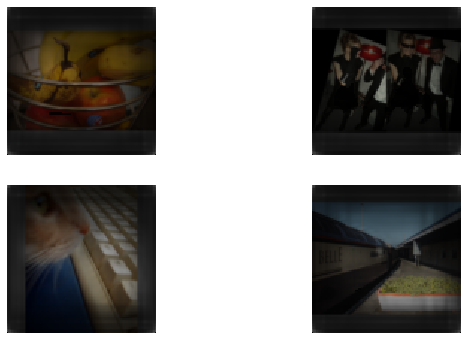

<Figure size 432x288 with 0 Axes>

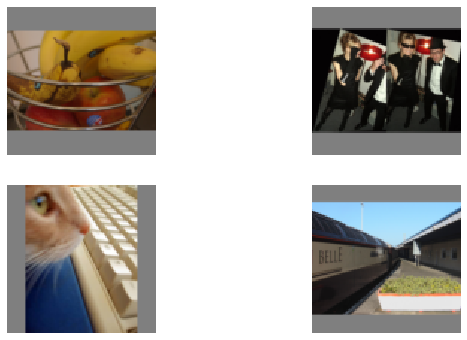

	[3/10] 	 Accuracy:0.130	F1:0.033	Loss: 110.008
	[3/10] 	 Accuracy:0.120	F1:0.033	Loss: 109.211
	[3/10] 	 Accuracy:0.130	F1:0.034	Loss: 108.234
	[3/10] 	 Accuracy:0.154	F1:0.037	Loss: 107.860
	[3/10] 	 Accuracy:0.165	F1:0.039	Loss: 107.573
	[3/10] 	 Accuracy:0.173	F1:0.040	Loss: 106.129
	[3/10] 	 Accuracy:0.198	F1:0.044	Loss: 106.946
	[3/10] 	 Accuracy:0.211	F1:0.047	Loss: 107.330
	[3/10] 	 Accuracy:0.175	F1:0.041	Loss: 106.153
	[3/10] 	 Accuracy:0.185	F1:0.043	Loss: 107.119


<Figure size 432x288 with 0 Axes>

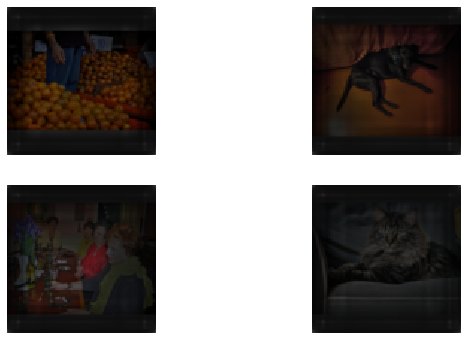

<Figure size 432x288 with 0 Axes>

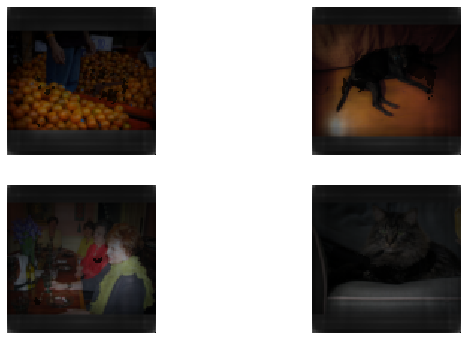

<Figure size 432x288 with 0 Axes>

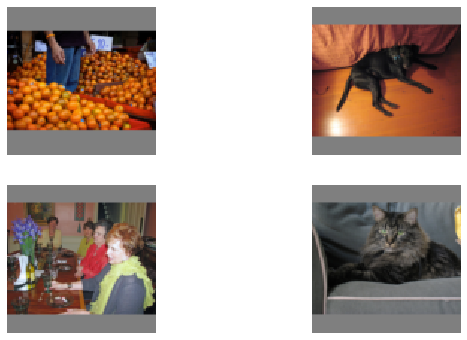

	[3/10] 	 Accuracy:0.204	F1:0.047	Loss: 106.416
	[3/10] 	 Accuracy:0.212	F1:0.048	Loss: 106.187
	[3/10] 	 Accuracy:0.244	F1:0.053	Loss: 104.838
	[3/10] 	 Accuracy:0.278	F1:0.060	Loss: 106.353
	[3/10] 	 Accuracy:0.257	F1:0.056	Loss: 106.161
	[3/10] 	 Accuracy:0.260	F1:0.056	Loss: 106.589
	[3/10] 	 Accuracy:0.247	F1:0.055	Loss: 106.054
	[3/10] 	 Accuracy:0.225	F1:0.051	Loss: 107.880
	[3/10] 	 Accuracy:0.226	F1:0.050	Loss: 106.920
	[3/10] 	 Accuracy:0.264	F1:0.055	Loss: 106.648


<Figure size 432x288 with 0 Axes>

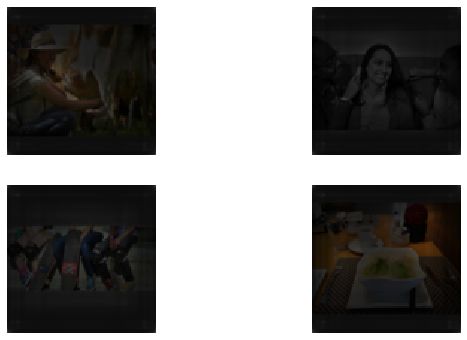

<Figure size 432x288 with 0 Axes>

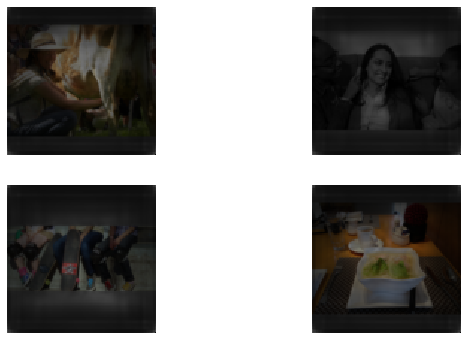

<Figure size 432x288 with 0 Axes>

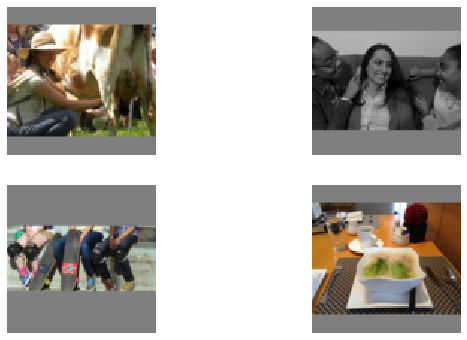

	[3/10] 	 Accuracy:0.256	F1:0.051	Loss: 106.334
	[3/10] 	 Accuracy:0.243	F1:0.048	Loss: 106.587
	[3/10] 	 Accuracy:0.237	F1:0.048	Loss: 105.529
	[3/10] 	 Accuracy:0.222	F1:0.048	Loss: 105.268
	[3/10] 	 Accuracy:0.195	F1:0.045	Loss: 104.953
	[3/10] 	 Accuracy:0.184	F1:0.045	Loss: 107.028
	[3/10] 	 Accuracy:0.192	F1:0.045	Loss: 107.859
	[3/10] 	 Accuracy:0.188	F1:0.043	Loss: 108.075
	[3/10] 	 Accuracy:0.186	F1:0.040	Loss: 108.040
	[3/10] 	 Accuracy:0.186	F1:0.041	Loss: 108.772


<Figure size 432x288 with 0 Axes>

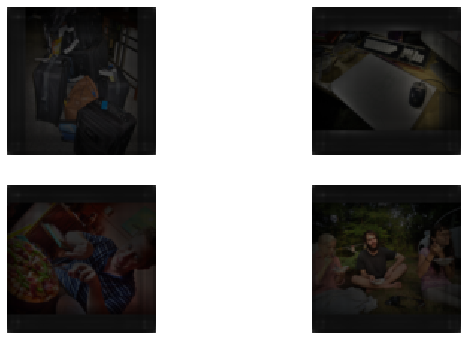

<Figure size 432x288 with 0 Axes>

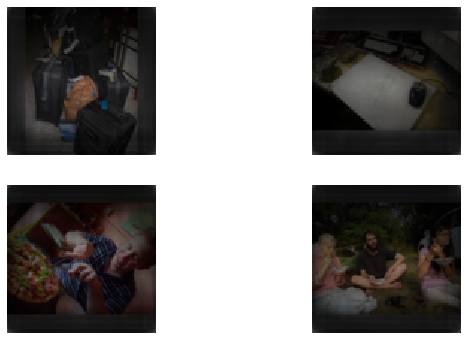

<Figure size 432x288 with 0 Axes>

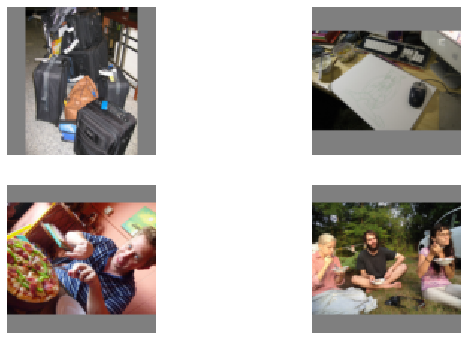

	[3/10] 	 Accuracy:0.188	F1:0.040	Loss: 106.780
	[3/10] 	 Accuracy:0.191	F1:0.043	Loss: 107.383
	[3/10] 	 Accuracy:0.207	F1:0.046	Loss: 106.214
	[3/10] 	 Accuracy:0.208	F1:0.047	Loss: 106.566
	[3/10] 	 Accuracy:0.217	F1:0.049	Loss: 105.057
Validating ...


<Figure size 432x288 with 0 Axes>

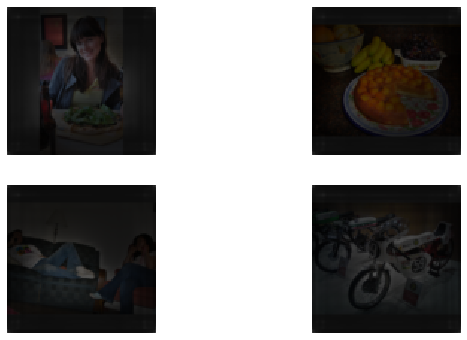

<Figure size 432x288 with 0 Axes>

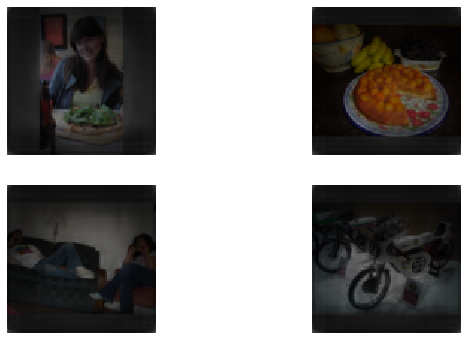

<Figure size 432x288 with 0 Axes>

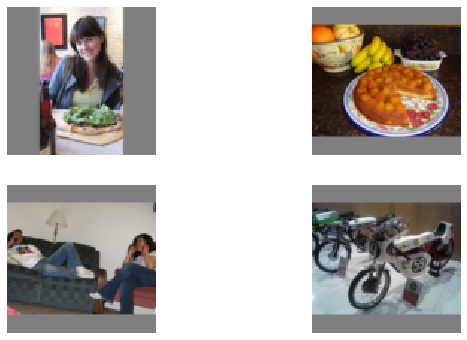

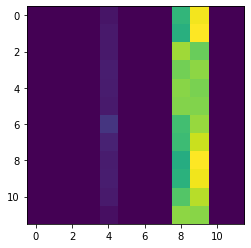

	[Validation] Acc 0.2313	F1 0.0471
	[4/10] 	 Accuracy:0.223	F1:0.050	Loss: 105.064
	[4/10] 	 Accuracy:0.228	F1:0.049	Loss: 104.533
	[4/10] 	 Accuracy:0.222	F1:0.048	Loss: 104.806
	[4/10] 	 Accuracy:0.223	F1:0.049	Loss: 105.316
	[4/10] 	 Accuracy:0.230	F1:0.050	Loss: 106.777


<Figure size 432x288 with 0 Axes>

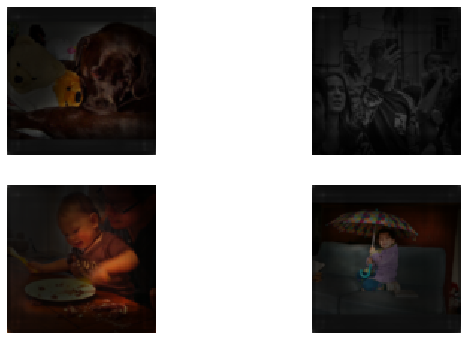

<Figure size 432x288 with 0 Axes>

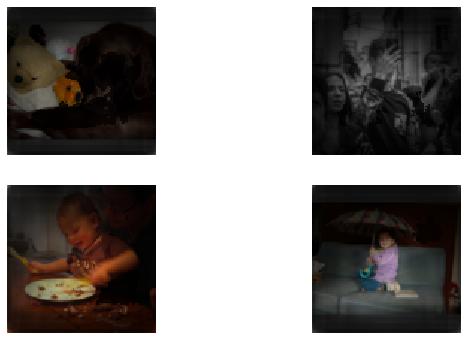

<Figure size 432x288 with 0 Axes>

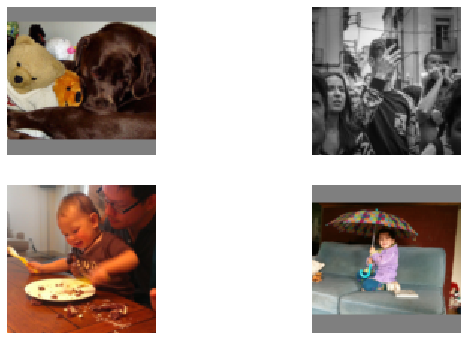

	[4/10] 	 Accuracy:0.224	F1:0.049	Loss: 106.883
	[4/10] 	 Accuracy:0.221	F1:0.049	Loss: 106.699
	[4/10] 	 Accuracy:0.214	F1:0.048	Loss: 105.698
	[4/10] 	 Accuracy:0.210	F1:0.046	Loss: 106.035
	[4/10] 	 Accuracy:0.199	F1:0.044	Loss: 103.802
	[4/10] 	 Accuracy:0.196	F1:0.043	Loss: 103.485
	[4/10] 	 Accuracy:0.197	F1:0.043	Loss: 102.909
	[4/10] 	 Accuracy:0.199	F1:0.043	Loss: 102.028
	[4/10] 	 Accuracy:0.197	F1:0.042	Loss: 101.998
	[4/10] 	 Accuracy:0.193	F1:0.042	Loss: 104.145


<Figure size 432x288 with 0 Axes>

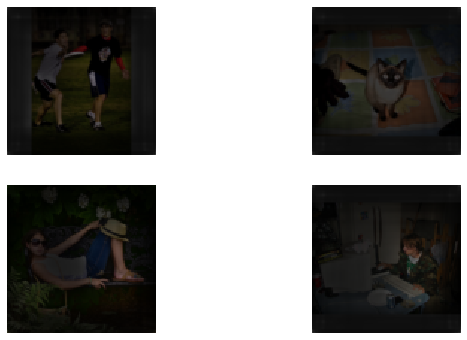

<Figure size 432x288 with 0 Axes>

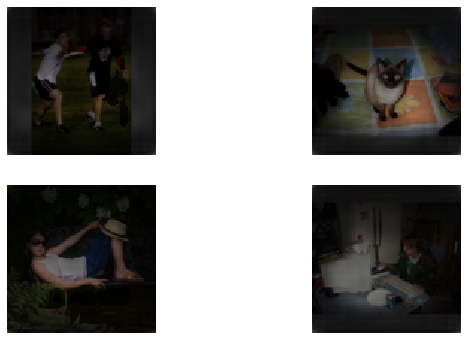

<Figure size 432x288 with 0 Axes>

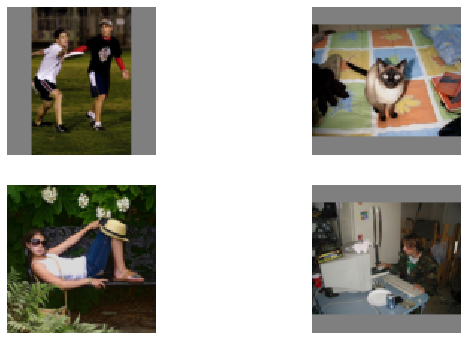

	[4/10] 	 Accuracy:0.192	F1:0.043	Loss: 103.870
	[4/10] 	 Accuracy:0.193	F1:0.044	Loss: 104.201
	[4/10] 	 Accuracy:0.186	F1:0.043	Loss: 105.494
	[4/10] 	 Accuracy:0.187	F1:0.043	Loss: 105.077
	[4/10] 	 Accuracy:0.185	F1:0.044	Loss: 104.759
	[4/10] 	 Accuracy:0.192	F1:0.043	Loss: 105.894
	[4/10] 	 Accuracy:0.186	F1:0.042	Loss: 107.503
	[4/10] 	 Accuracy:0.172	F1:0.040	Loss: 108.653
	[4/10] 	 Accuracy:0.169	F1:0.040	Loss: 108.256
	[4/10] 	 Accuracy:0.173	F1:0.039	Loss: 107.356


<Figure size 432x288 with 0 Axes>

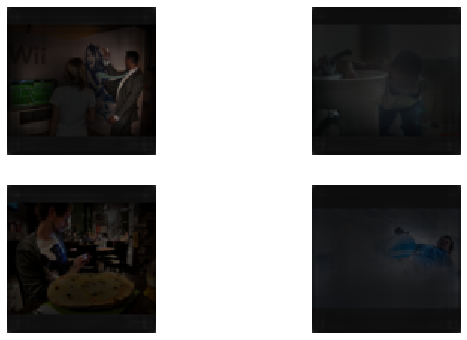

<Figure size 432x288 with 0 Axes>

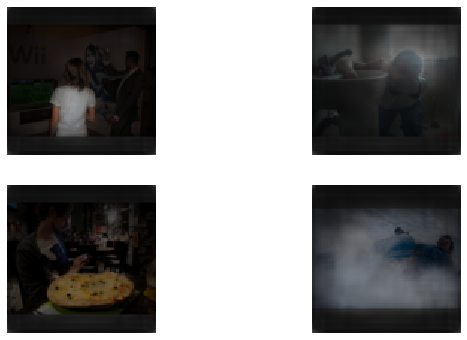

<Figure size 432x288 with 0 Axes>

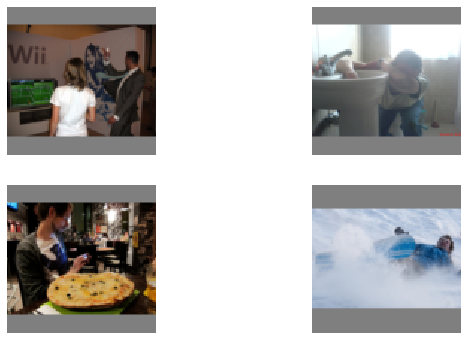

	[4/10] 	 Accuracy:0.172	F1:0.043	Loss: 106.632
	[4/10] 	 Accuracy:0.181	F1:0.043	Loss: 105.629
	[4/10] 	 Accuracy:0.198	F1:0.045	Loss: 105.513
	[4/10] 	 Accuracy:0.201	F1:0.046	Loss: 105.197
	[4/10] 	 Accuracy:0.195	F1:0.044	Loss: 107.352
	[4/10] 	 Accuracy:0.195	F1:0.042	Loss: 107.211
	[4/10] 	 Accuracy:0.197	F1:0.042	Loss: 108.423
	[4/10] 	 Accuracy:0.192	F1:0.043	Loss: 106.913
	[4/10] 	 Accuracy:0.184	F1:0.042	Loss: 105.786
	[4/10] 	 Accuracy:0.175	F1:0.041	Loss: 104.808


<Figure size 432x288 with 0 Axes>

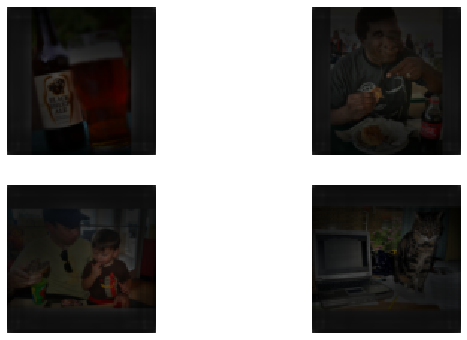

<Figure size 432x288 with 0 Axes>

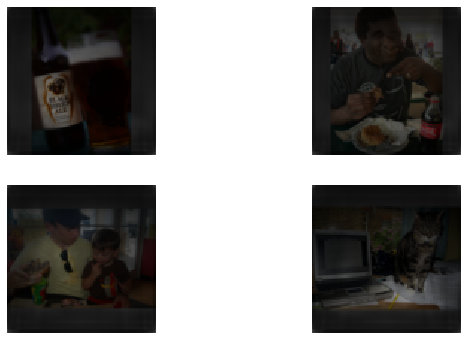

<Figure size 432x288 with 0 Axes>

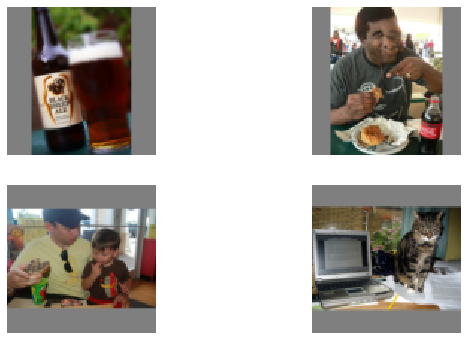

	[4/10] 	 Accuracy:0.163	F1:0.041	Loss: 104.921
	[4/10] 	 Accuracy:0.134	F1:0.036	Loss: 103.065
	[4/10] 	 Accuracy:0.124	F1:0.034	Loss: 103.077
	[4/10] 	 Accuracy:0.122	F1:0.034	Loss: 104.966
	[4/10] 	 Accuracy:0.124	F1:0.035	Loss: 104.010
	[4/10] 	 Accuracy:0.128	F1:0.035	Loss: 104.792
	[4/10] 	 Accuracy:0.139	F1:0.038	Loss: 103.319
Validating ...


<Figure size 432x288 with 0 Axes>

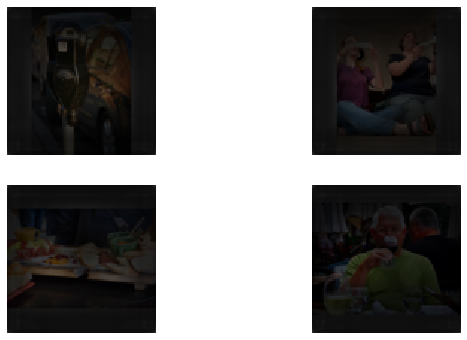

<Figure size 432x288 with 0 Axes>

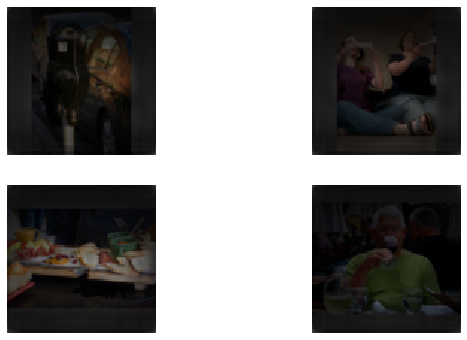

<Figure size 432x288 with 0 Axes>

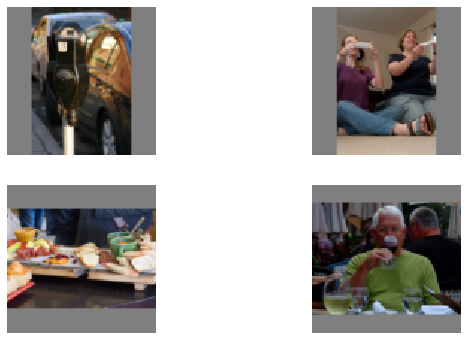

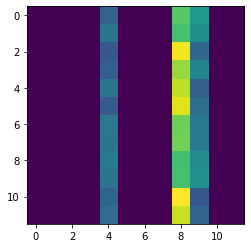

	[Validation] Acc 0.1468	F1 0.0429
	[5/10] 	 Accuracy:0.140	F1:0.039	Loss: 102.632
	[5/10] 	 Accuracy:0.142	F1:0.039	Loss: 104.501
	[5/10] 	 Accuracy:0.143	F1:0.039	Loss: 103.970
	[5/10] 	 Accuracy:0.140	F1:0.039	Loss: 103.846


<Figure size 432x288 with 0 Axes>

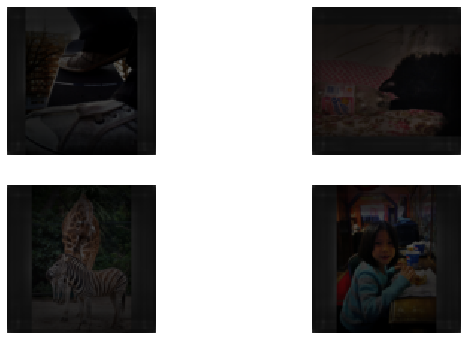

<Figure size 432x288 with 0 Axes>

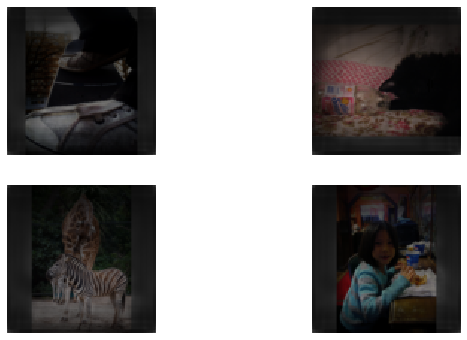

<Figure size 432x288 with 0 Axes>

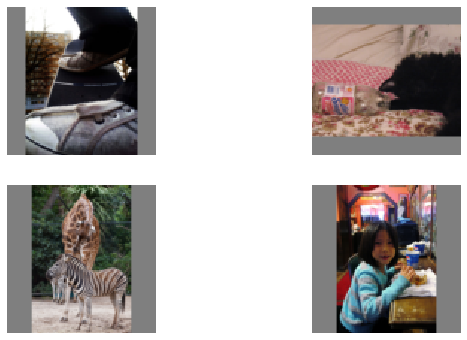

	[5/10] 	 Accuracy:0.151	F1:0.041	Loss: 104.504
	[5/10] 	 Accuracy:0.168	F1:0.041	Loss: 106.137
	[5/10] 	 Accuracy:0.170	F1:0.042	Loss: 104.696
	[5/10] 	 Accuracy:0.180	F1:0.044	Loss: 104.794
	[5/10] 	 Accuracy:0.188	F1:0.043	Loss: 103.647


KeyboardInterrupt: 

In [19]:
#establish weights on supercategory classes
category_count, supercategory_count = get_category_counts(train.indices, metadata["images"], metadata["annotations"])
supercat_weights = class_weight(supercategory_count)
helper_dicts = get_dicts()
sweights = {helper_dicts["supercat_to_sl"][k]: supercat_weights[k] for k in supercat_weights.keys()}
sweights = [sweights[i] for i in range(len(sweights))]

dflist = []
net = Net(strength = strength).to(device)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)

class_weights = torch.Tensor(sweights).to(device)
criterion = nn.CrossEntropyLoss(weight = class_weights)

runner = Runner(net, optimizer, criterion, penalty = 5000, n=2, device = device, name = "to_remove")
runner.train(train_loader, val_loader, epochs = 10)

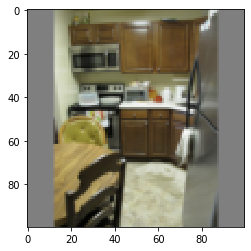

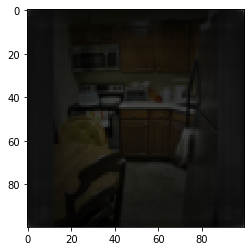

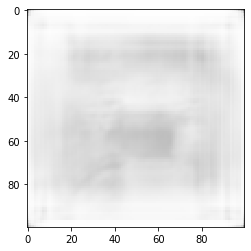

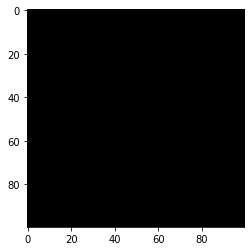

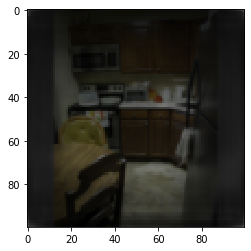

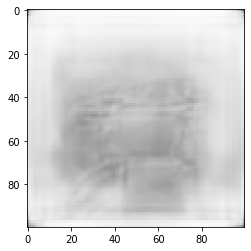

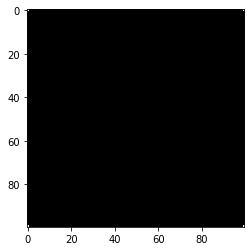

In [26]:
def toshow(x): 
    x = x.detach().cpu().numpy()
    plt.imshow(np.moveaxis(x, [0, 1, 2],[2, 0, 1]))
    plt.show()

n = 2
for i, (x, data, labels) in enumerate(train_loader):
    x = x.to(device)
    toshow(x[0])
    data = [d.to(device) for d in data]
    labels = [l.to(device) for l in labels]

    net.initHidden(device, x.shape[0])
    out_mask = {}

    out_mask["out"] = torch.zeros(labels[0].shape[0], 10).to(device)
    out_mask["conv1_in"] = torch.zeros_like(net.hidden["conv1_in"])
    out_mask["conv2_in"] = torch.zeros_like(net.hidden["conv2_in"])
    out_mask["conv3_in"] = torch.zeros_like(net.hidden["conv3_in"])
    out_mask["conv4_in"] = torch.zeros_like(net.hidden["conv4_in"])
    maskarray=[]

    #set the choice mask to all false
    findselectmask = torch.zeros((x.shape[0], n)).type(torch.bool)
    for _ in range(n):
        net.initHidden(device, x.shape[0])
        for j in range(5): 
            out = net(x, out_mask = out_mask)

        #get the masked input
        masked = net.latent["in"]

        maskarray.append(masked.detach().cpu().numpy().copy())

        #we want to find which digit the network selected
        #to do this, we calculate the MSE with each of the objects
        #and select the index of the one with the minimum from each sample
        #the result is a batch_size x n matrix of losses
        findselect = [torch.sum(torch.nn.MSELoss(reduction='none')(masked, x).detach(), dim= [1, 2, 3]) for x in data]
        findselect = torch.stack(findselect).T
        findselect[findselectmask] = 1e10 #~infinity

        #the selected digit is the argmin of these
        select = torch.argmin(findselect, axis = 1)
        findselectmask[np.arange(len(findselectmask)), select] = True

        #concatenate y1 ... yn and index by output
        merge_y = torch.cat([y.reshape(-1, 1) for y in labels], 1)
        #selected out is the label corresponding with the maximum output
        selected_out = merge_y[np.arange(len(merge_y)), select]

        _, pred = torch.max(out, 1)

        out_mask["conv1_in"] = ((out_mask["conv1_in"] + (net.hidden["conv1_in"] < 0.5)) > 0.5).type(torch.int)
        out_mask["conv2_in"] = ((out_mask["conv2_in"] + (net.hidden["conv2_in"] < 0.5)) > 0.5).type(torch.int)
        out_mask["conv3_in"] = ((out_mask["conv3_in"] + (net.hidden["conv3_in"] < 0.5)) > 0.5).type(torch.int)
        out_mask["conv4_in"] = ((out_mask["conv4_in"] + (net.hidden["conv4_in"] < 0.5)) > 0.5).type(torch.int)

        toshow(masked[0])
        toshow(net.hidden["conv1_in"][0])
        toshow(out_mask["conv1_in"][0] * 1.0)
    break

In [16]:
out_mask["conv1_in"][0]

tensor([[[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 0,  ..., 1, 1, 1],
         ...,
         [1, 1, 0,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]],

        [[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 0,  ..., 1, 1, 1],
         ...,
         [1, 1, 0,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]],

        [[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 0,  ..., 1, 1, 1],
         ...,
         [1, 1, 0,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]]], device='cuda:2', dtype=torch.int32)